<a href="https://colab.research.google.com/github/vishu9219/stockmarketcodes/blob/master/GoldenRatio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Necessary Libraries:

`yfinance`: Use `yfinance` to download historical data

`pandas`: Use `pandas` to calculate Moving Averages and Implement Crossover
Logic.

In [24]:
!pip install yfinance pandas numpy requests



*   Retrieves historical stock data for stocks.
*   Calculates the 50-day and 200-day moving averages.
*   Determines where the 50-day moving average crosses the 200-day moving average and marks these points as buy or sell signals.
*   Plots the stock price, moving averages, and signals on a graph.



In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_for_stock_indicator(stock):
  # Download historical data for RELIANCE.NS
  stock = stock + ".NS"
  data = yf.download(stock, start='2020-01-01')

  # Calculate 50-day and 200-day moving averages
  data['50_MA'] = data['Close'].rolling(window=50).mean()
  data['200_MA'] = data['Close'].rolling(window=200).mean()

  # Identify Crossover points
  data['Signal'] = 0.0
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)

  # Generate trading orders
  data['Position'] = data['Signal'].diff()

  # Plotting
  plt.figure(figsize=(12,6))
  plt.plot(data['Close'], label=stock, alpha=0.5)
  plt.plot(data['50_MA'], label='50-Day MA', alpha=0.9)
  plt.plot(data['200_MA'], label='200-Day MA', alpha=0.9)

  # Highlight buy and sell signals
  plt.plot(data[data['Position'] == 1].index,
          data['50_MA'][data['Position'] == 1],
          '^', markersize=10, color='g', lw=0, label='Buy Signal')
  plt.plot(data[data['Position'] == -1].index,
          data['50_MA'][data['Position'] == -1],
          'v', markersize=10, color='r', lw=0, label='Sell Signal')

  plt.title(f'Golden Ratio Crossover - {stock}')
  plt.legend()
  plt.show()

Common code to download data from NSE website about indices which is being targeted here.

In [26]:
import requests
from io import StringIO

def get_data_from_nse(url):
  # Send a GET request to the URL
  print(f"processing for {url}")
  header={
      'User-Agent': 'PostmanRuntime/7.35.0',
      'Accept': '*/*',
      'Postman-Token': 'c3fae3da-7a3b-4294-b4eb-a4542790d65d',
      'Host': 'www.niftyindices.com',
      'Accept-Encoding': 'gzip, deflate, br',
      'Connection': 'keep-alive'
  }
  response = requests.get(url, headers=header)
  print(f"Got the response")

  # Check if the request was successful
  if response.status_code == 200:
      print(f"converting to stringIO")
      # Use StringIO to read CSV content
      csv_content = StringIO(response.content.decode('utf-8'))

      print(f"create dataframe")
      # Load content into a DataFrame
      df = pd.read_csv(csv_content, dtype=str)

      # Display the first few rows of the DataFrame
      print(df.head())
      return df
  else:
      print(f"Failed to download file: status code {response.status_code}")
      return None

Call the `get_data_from_nse` for targeted nse strategies.

processing for https://www.niftyindices.com/IndexConstituent/ind_nifty200Momentum30_list.csv
Got the response
converting to stringIO
create dataframe
                Company Name                        Industry      Symbol  \
0             ABB India Ltd.                   Capital Goods         ABB   
1  Aditya Birla Capital Ltd.              Financial Services   ABCAPITAL   
2          Apollo Tyres Ltd.  Automobile and Auto Components  APOLLOTYRE   
3                Astral Ltd.                   Capital Goods      ASTRAL   
4      Aurobindo Pharma Ltd.                      Healthcare  AUROPHARMA   

  Series     ISIN Code  
0     EQ  INE117A01022  
1     EQ  INE674K01013  
2     EQ  INE438A01022  
3     EQ  INE006I01046  
4     EQ  INE406A01037  
processing for https://www.niftyindices.com/IndexConstituent/ind_nifty200alpha30_list.csv
Got the response
converting to stringIO
create dataframe
                Company Name                        Industry      Symbol  \
0             ABB In

<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


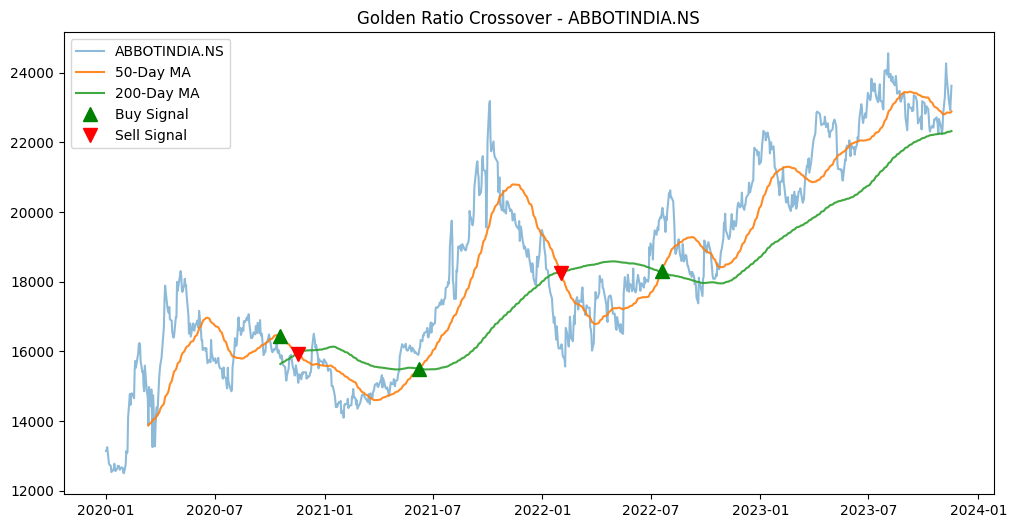

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


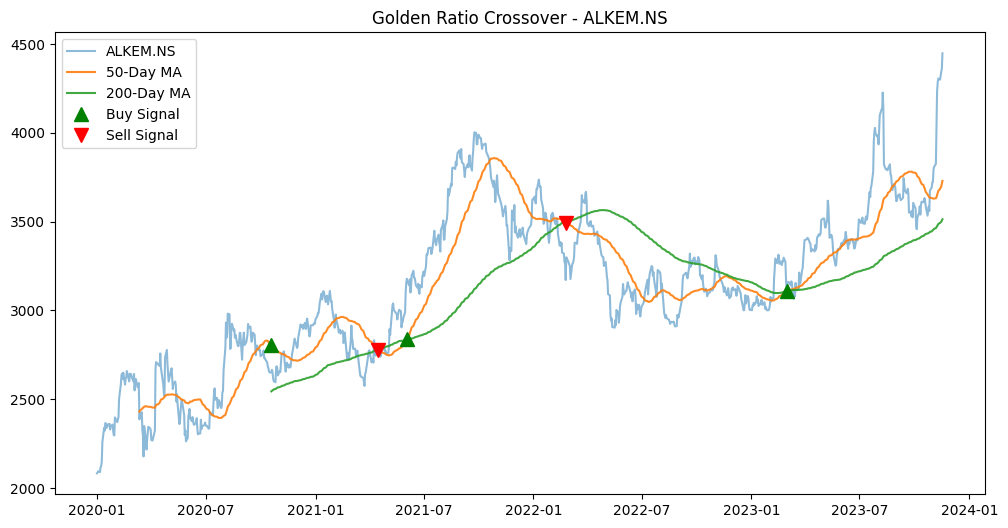

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


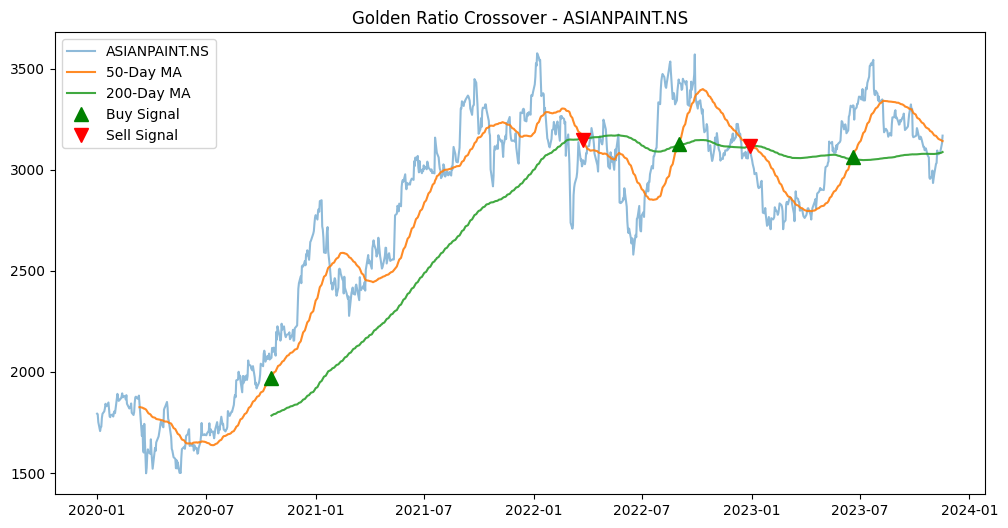

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


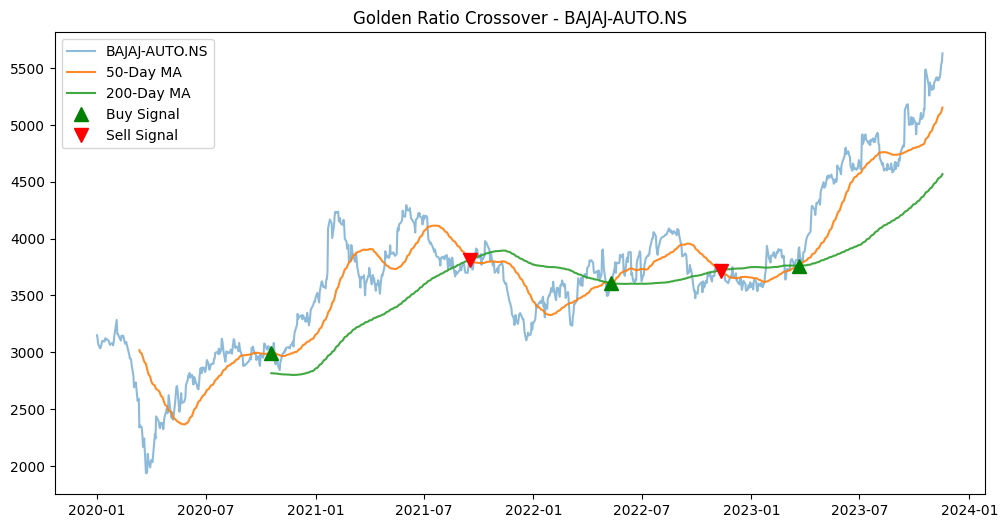

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


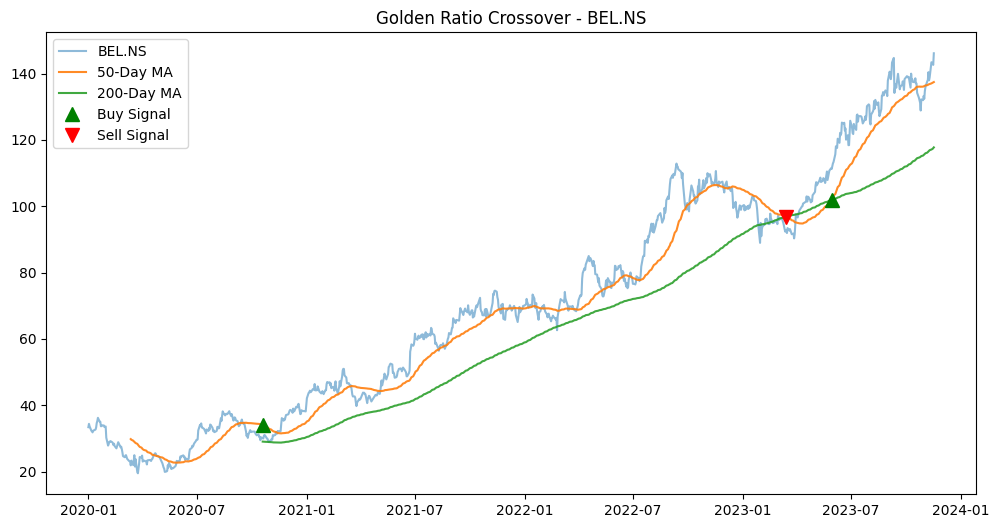

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


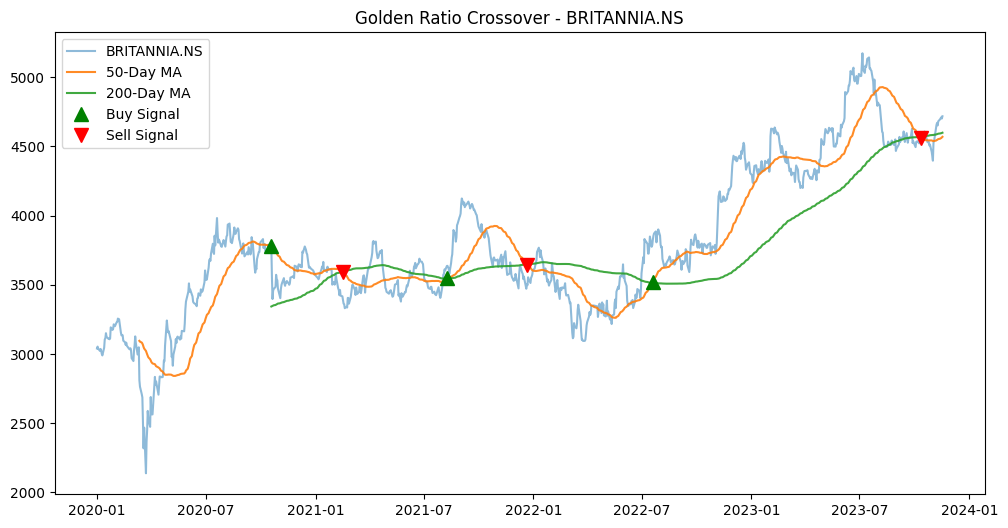

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


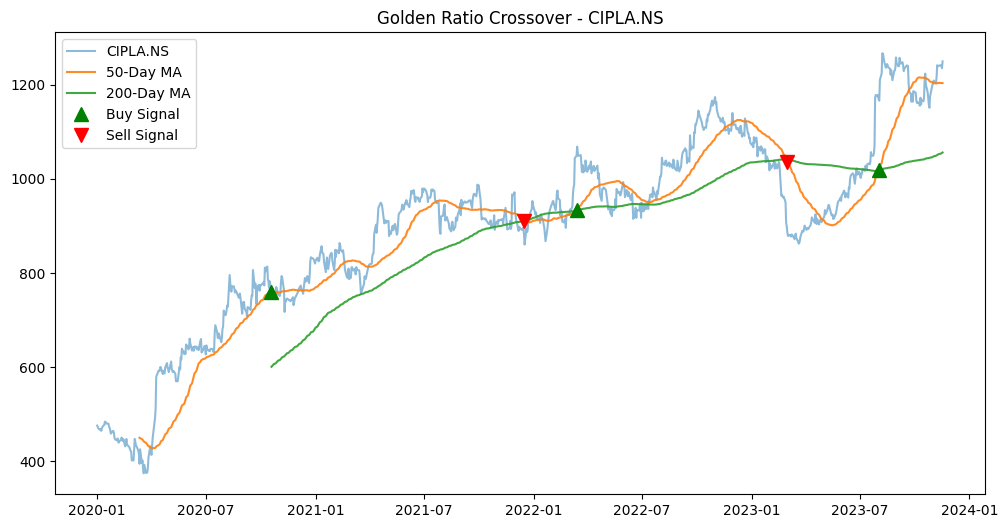

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


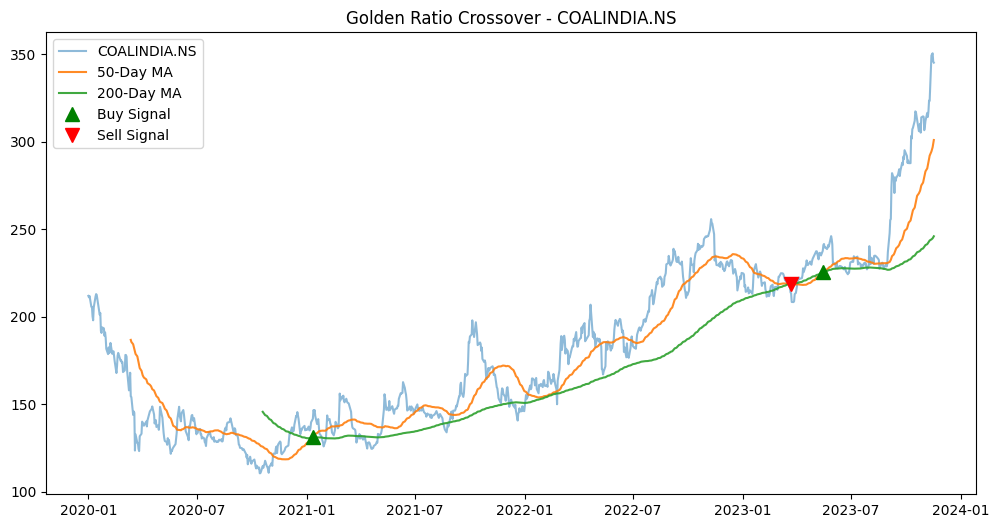

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


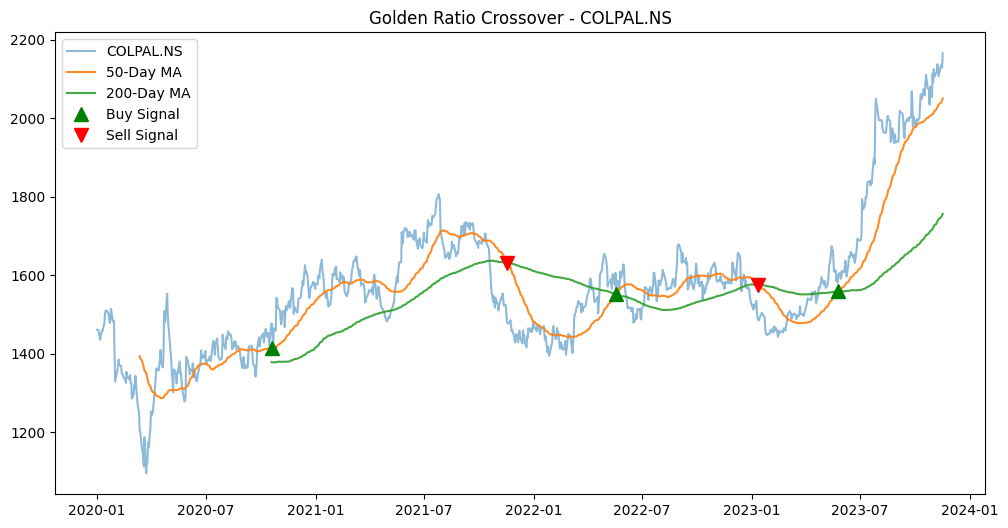

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


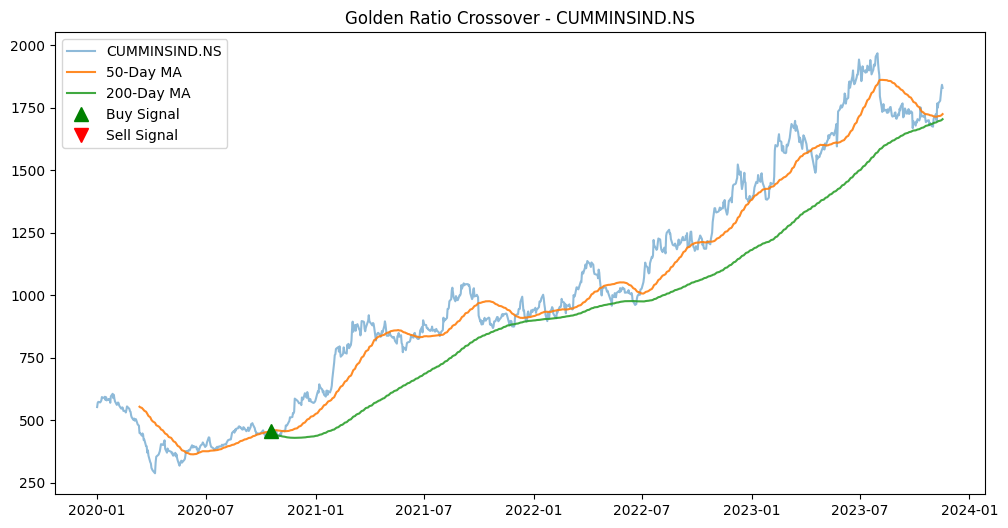

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


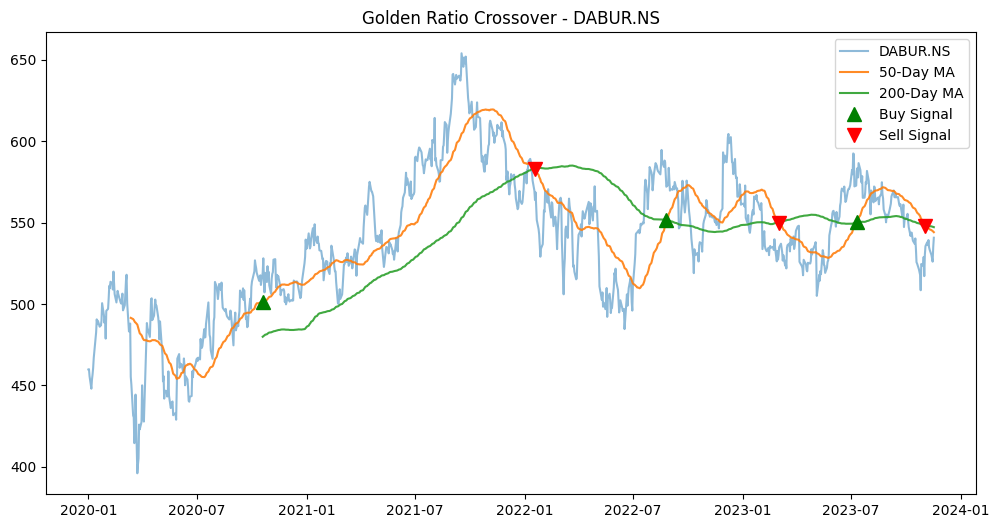

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


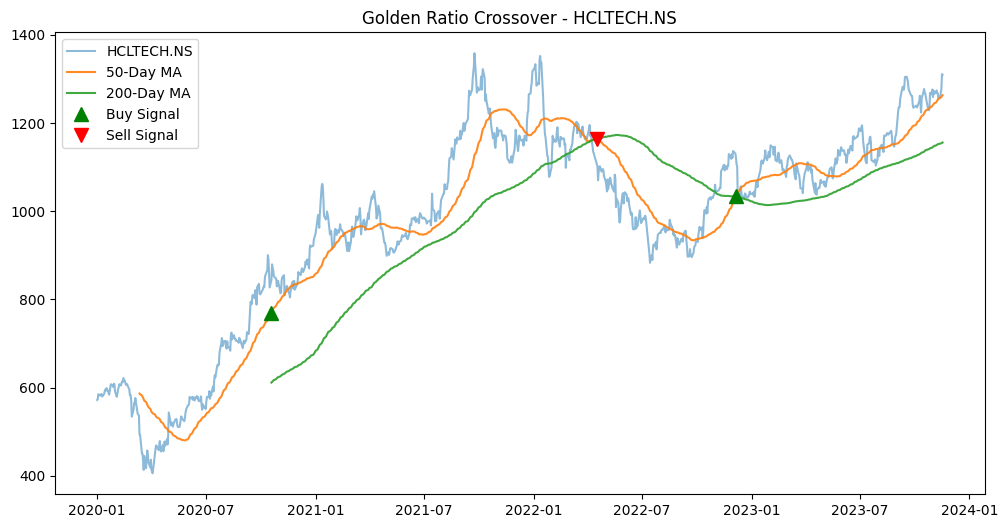

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


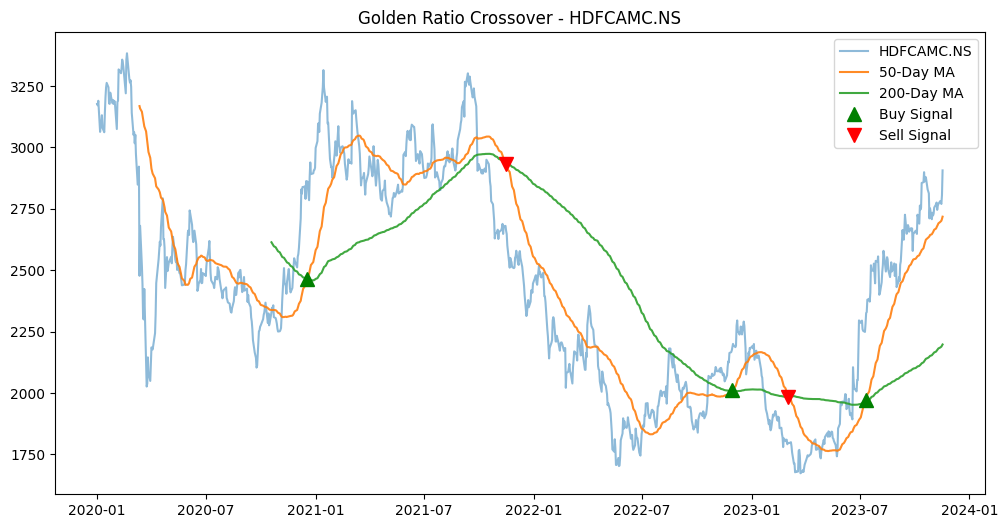

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


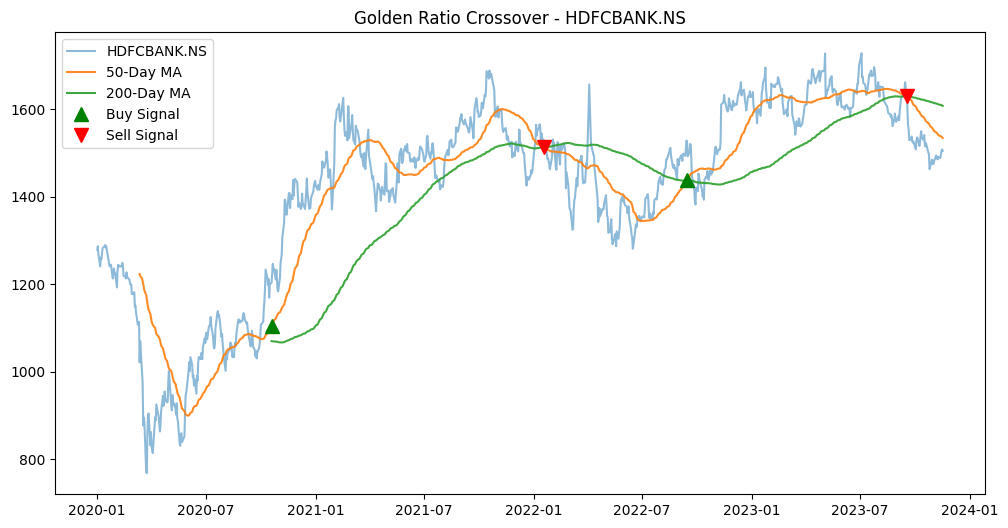

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


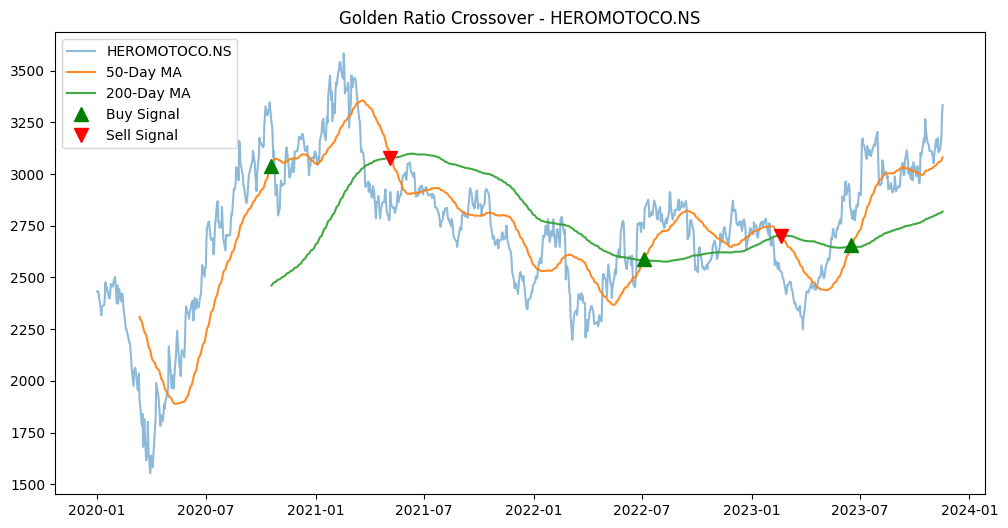

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


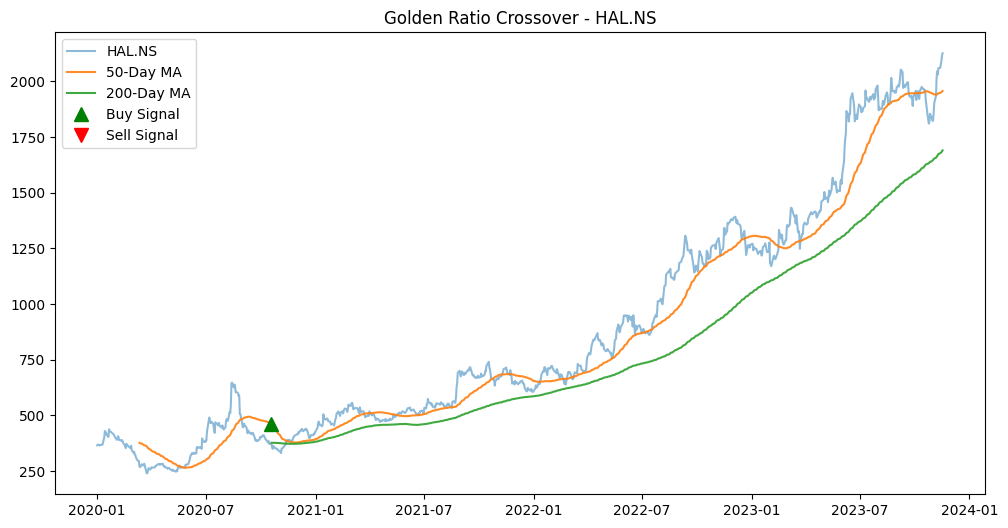

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


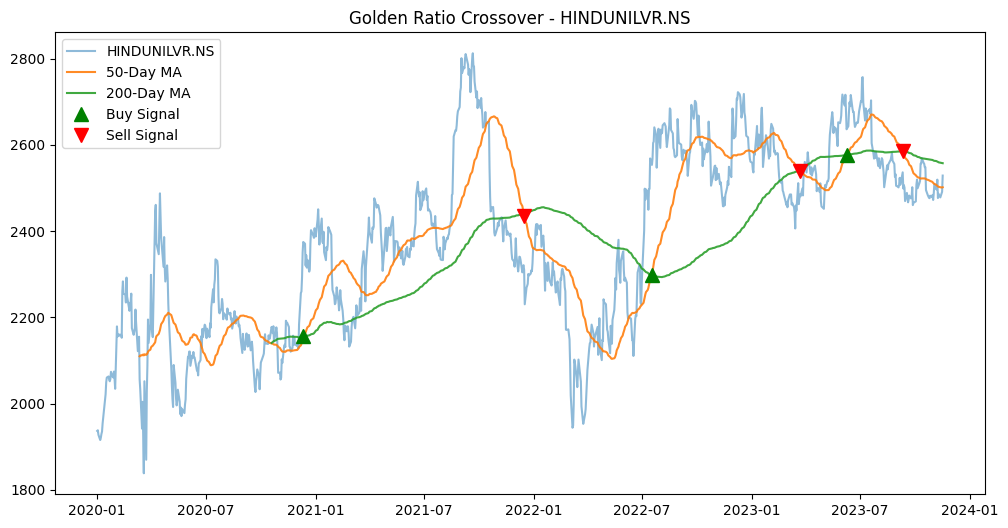

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


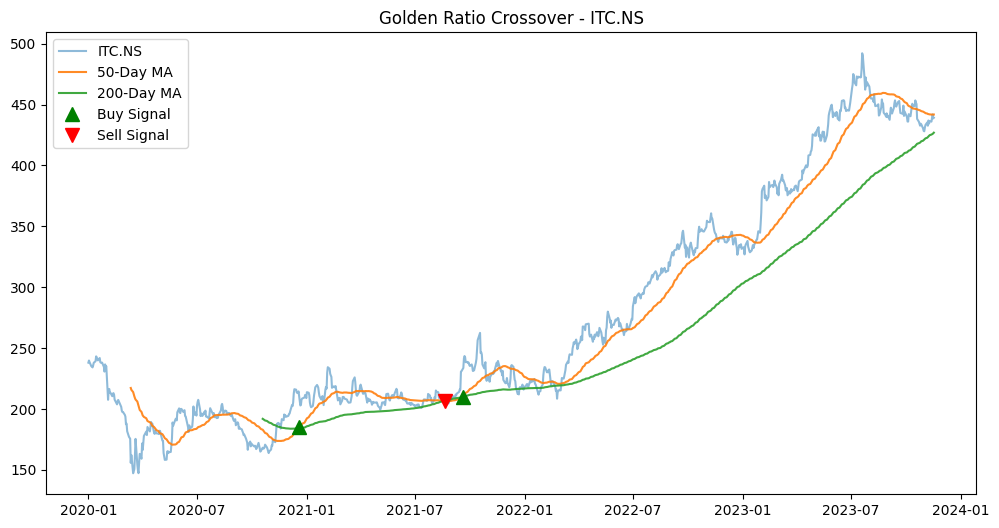

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


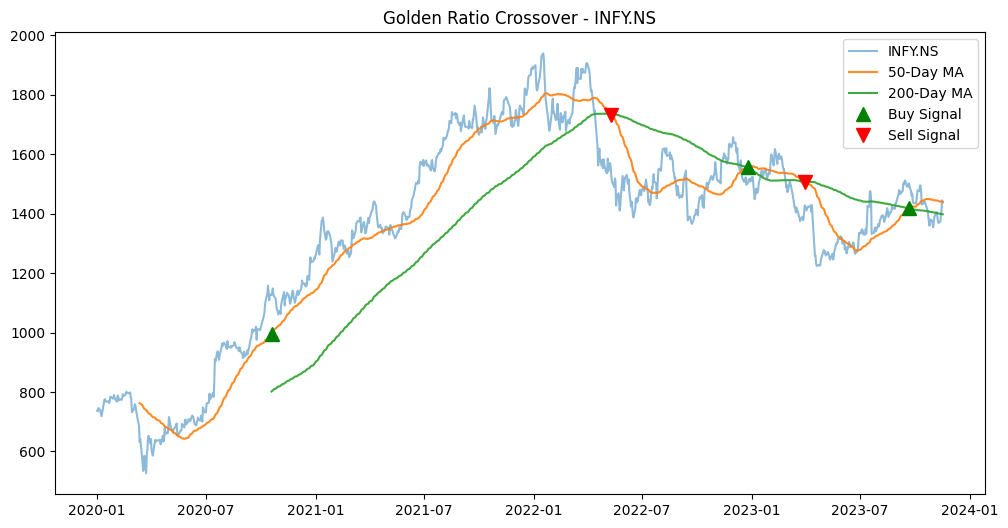

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


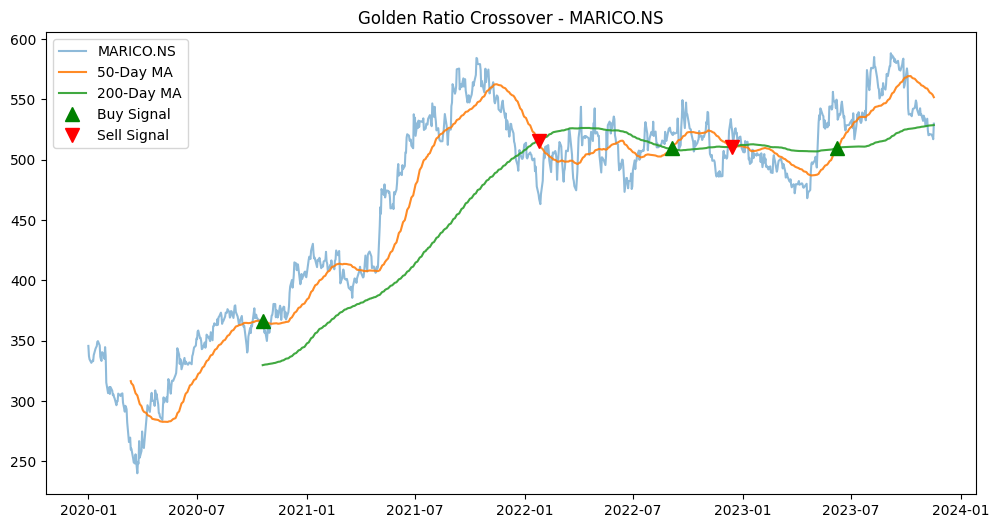

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


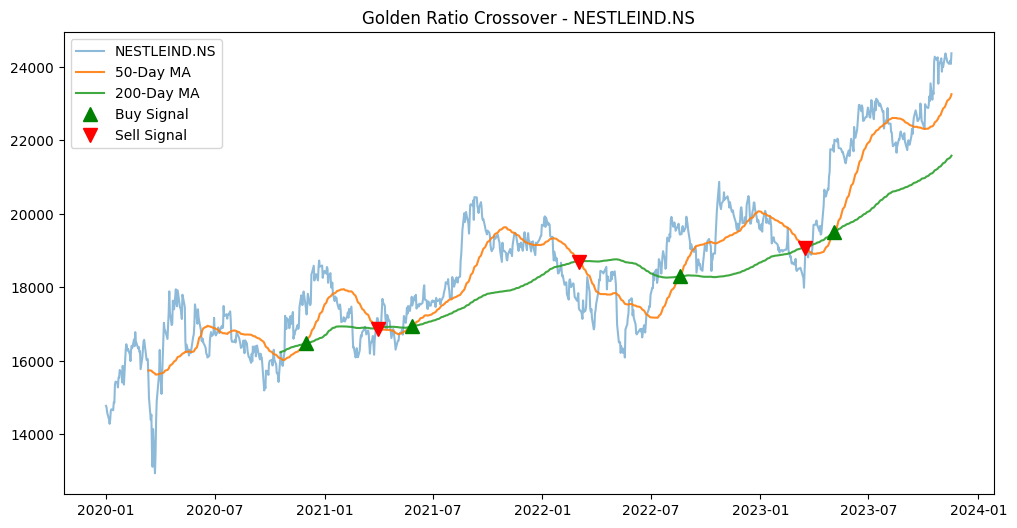

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


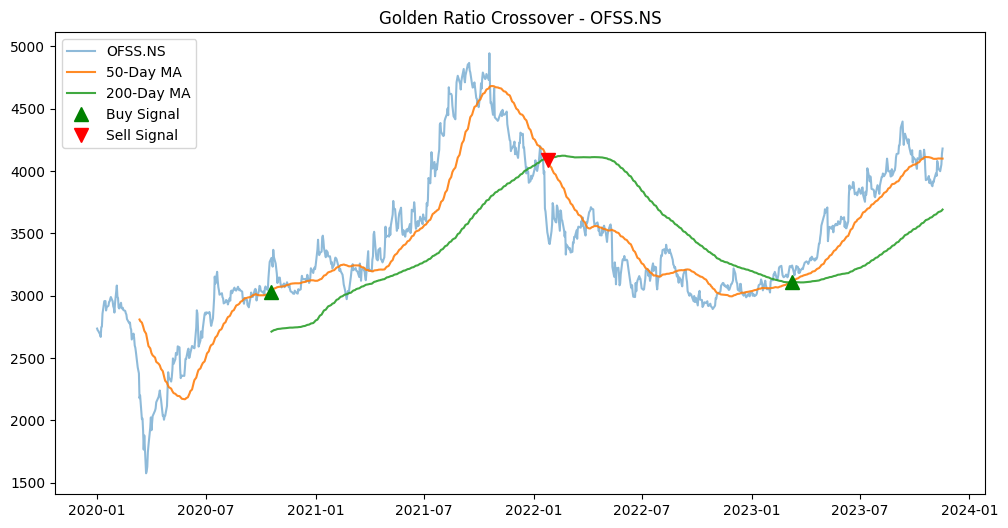

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


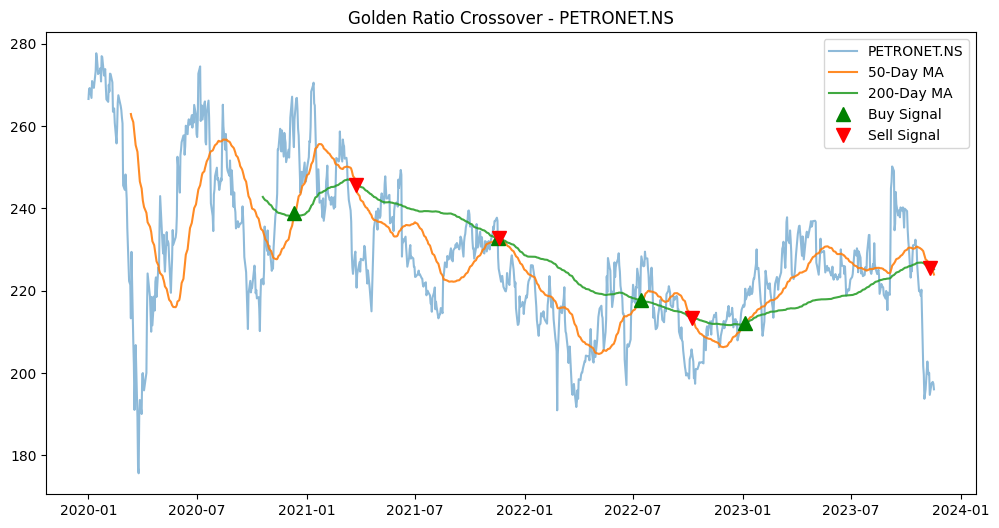

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


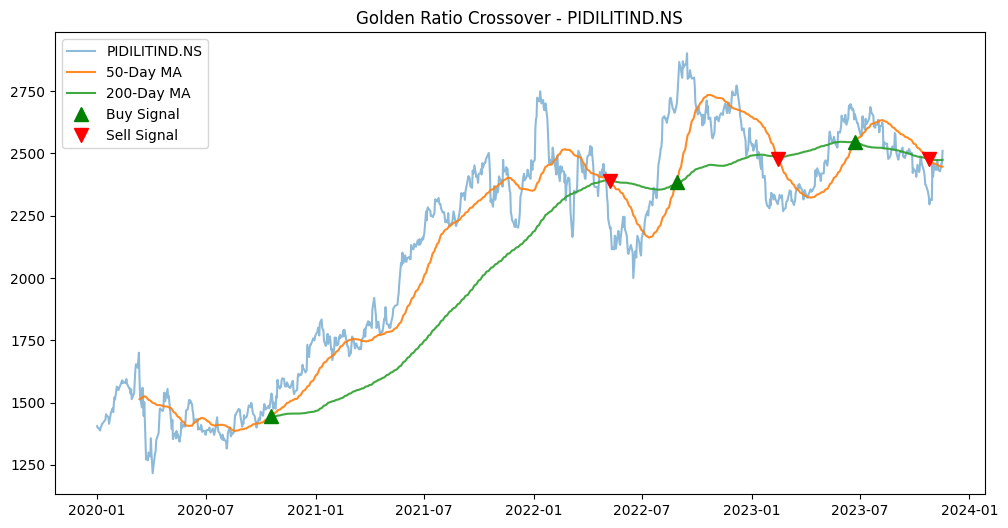

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


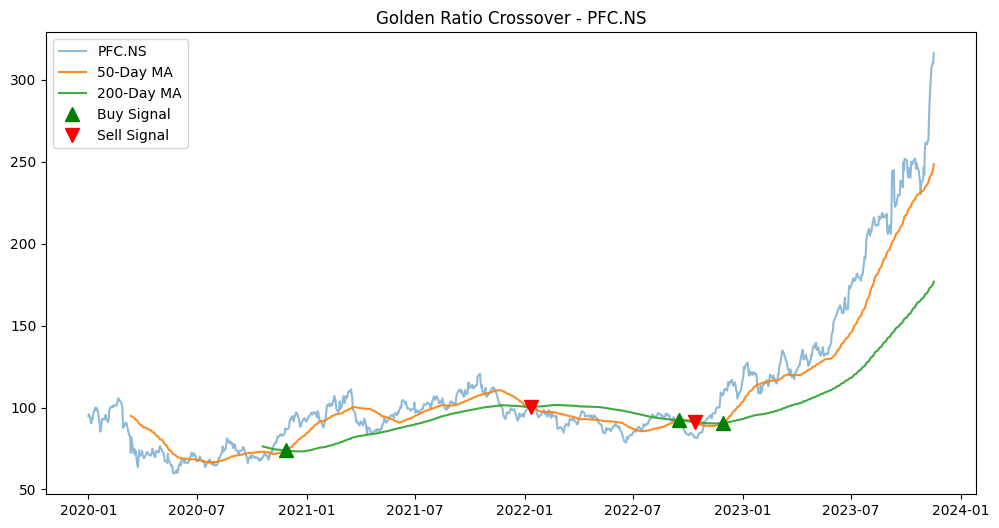

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


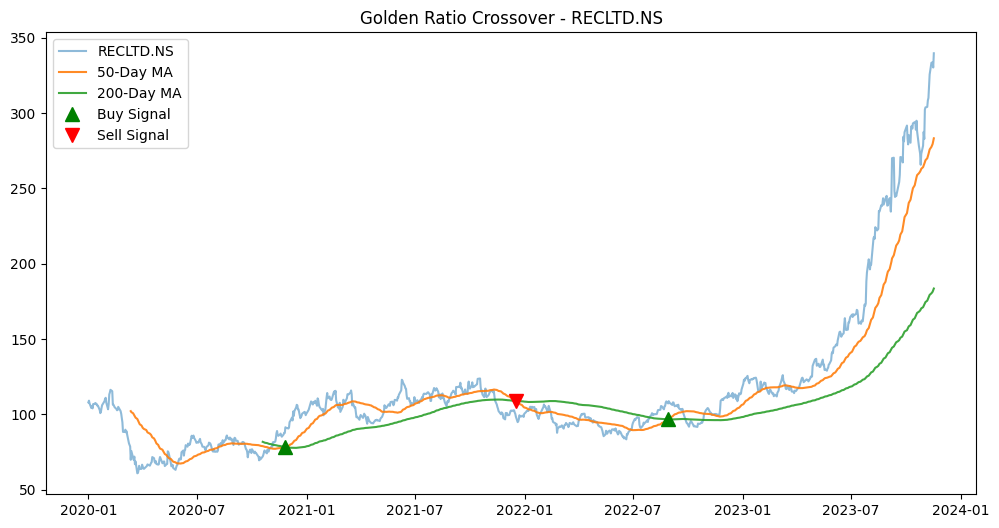

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


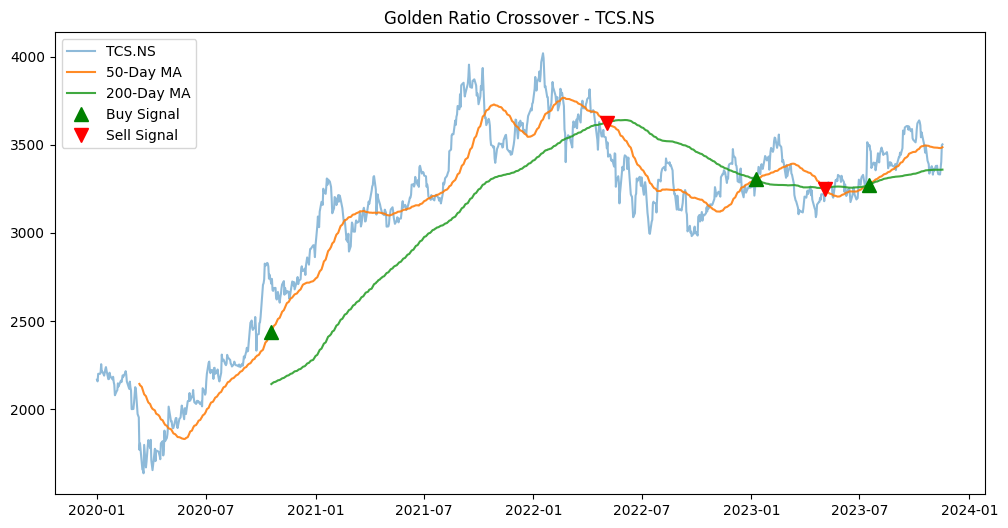

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


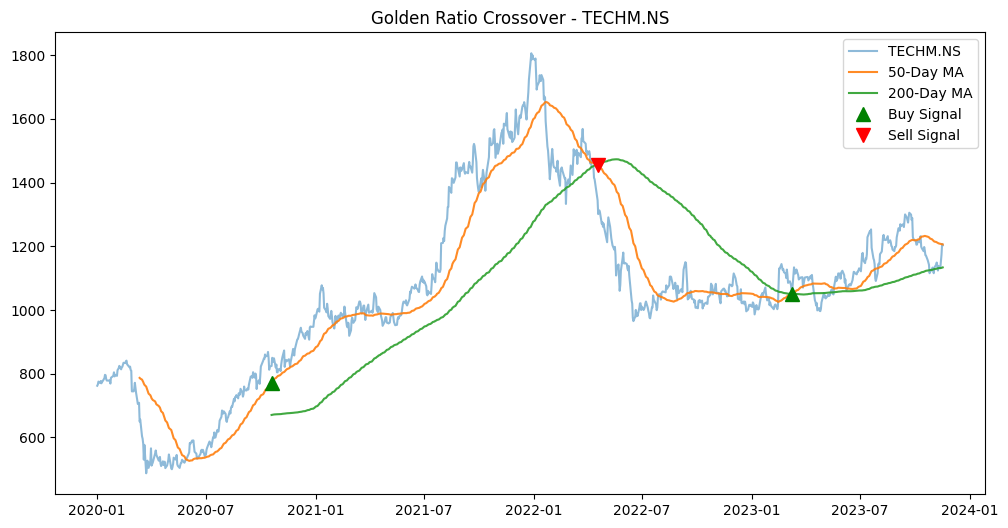

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


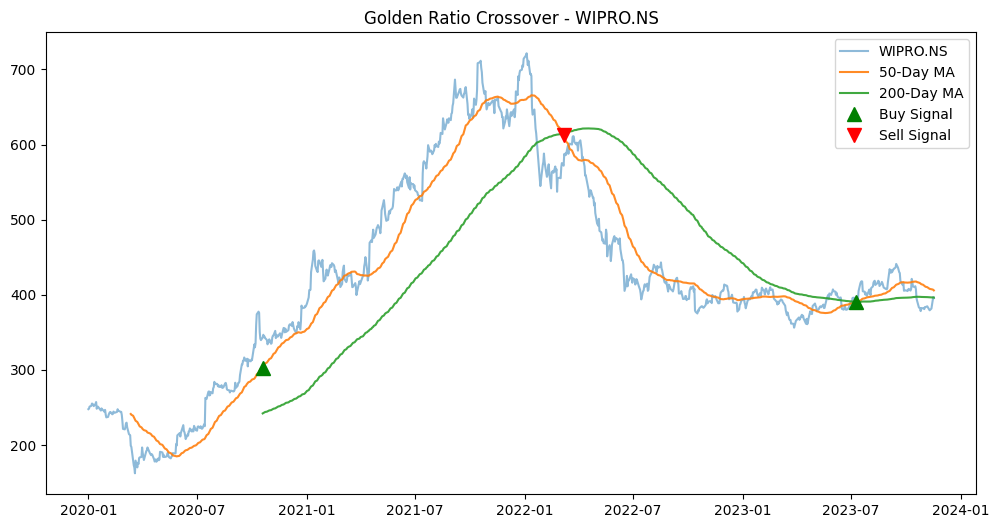

[*********************100%%**********************]  1 of 1 completed


<ipython-input-25-ecb8c247697e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1.0, 0.0)


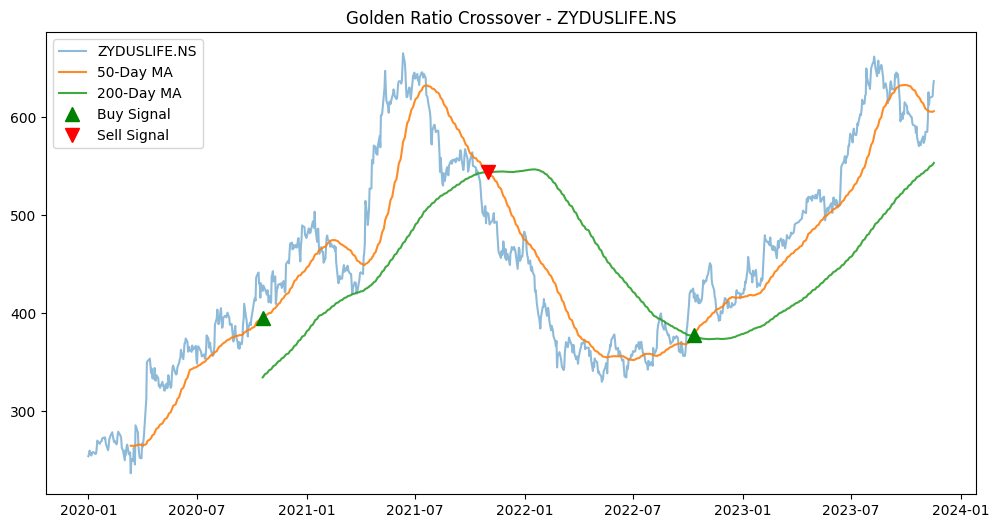

In [27]:
urls=[
    'https://www.niftyindices.com/IndexConstituent/ind_nifty200Momentum30_list.csv',
    'https://www.niftyindices.com/IndexConstituent/ind_nifty200alpha30_list.csv',
    'https://www.niftyindices.com/IndexConstituent/ind_nifty100Alpha30list.csv',
    'https://www.niftyindices.com/IndexConstituent/ind_nifty_Alpha_Index.csv',
    'https://www.niftyindices.com/IndexConstituent/ind_nifty_alpha_lowvol30list.csv',
    'https://www.niftyindices.com/IndexConstituent/ind_nifty_alpha_quality_lowvol30list.csv',
    'https://www.niftyindices.com/IndexConstituent/ind_nifty_alpha_quality_value_lowvol30list.csv',
    'https://www.niftyindices.com/IndexConstituent/ind_nifty_alpha_quality_value_lowvol30list.csv'
]

download_df=pd.DataFrame()
for url in urls:
  df = get_data_from_nse(url)
  if df is None:
    continue
  download_df=pd.concat([df, download_df], axis=0)

download_df=download_df[['Symbol']]
print(f"before dedup : {len(download_df)}")
download_df.drop_duplicates()
print(f"after dedup : {len(download_df)}")

for index, row in df.iterrows():
  process_for_stock_indicator(row['Symbol'])
